In [7]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
zipPath = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csvPath, _ = os.path.splitext(zipPath)

In [3]:
df = pd.read_csv(csvPath)

In [4]:
df = df[5::6]

In [5]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

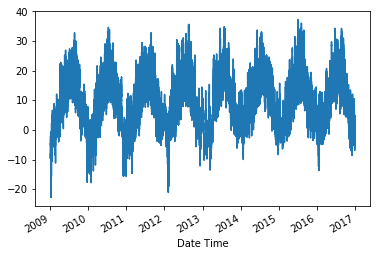

In [10]:
temp = df['T (degC)']
temp.plot()
plt.show()

In [18]:
def dfToXY(df, windowSize = 5):
    dfAsNp = df.to_numpy()
    X = []
    y = []
    for i in range(len(dfAsNp) - windowSize):
        row = [[a] for a in dfAsNp[i: i+5]] 
        X.append(row)
        label = dfAsNp[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [19]:
windowSize = 5
X, y = dfToXY(temp, windowSize)

In [20]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [23]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [24]:
cp = ModelCheckpoint('model1/', save_best_only = True)
model1.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [25]:
model1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, callbacks = [cp])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 48.5649 - root_mean_squared_error: 6.9689 - val_loss: 2.3447 - val_root_mean_squared_error: 1.5312


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 4.5200 - root_mean_squared_error: 2.1260 - val_loss: 0.7806 - val_root_mean_squared_error: 0.8835


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2856 - root_mean_squared_error: 1.1338 - val_loss: 0.5495 - val_root_mean_squared_error: 0.7413


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7647 - root_mean_squared_error: 0.8744 - val_loss: 0.5144 - val_root_mean_squared_error: 0.7172


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6895 - root_mean_squared_error: 0.8304 - val_loss: 0.5049 - val_root_mean_squared_error: 0.7105


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6675 - root_mean_squared_error: 0.8170 - val_loss: 0.4980 - val_root_mean_squared_error: 0.7057


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6567 - root_mean_squared_error: 0.8104 - val_loss: 0.4882 - val_root_mean_squared_error: 0.6987


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6495 - root_mean_squared_error: 0.8059 - val_loss: 0.4889 - val_root_mean_squared_error: 0.6992
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6461 - root_mean_squared_error: 0.8038 - val_loss: 0.4857 - val_root_mean_squared_error: 0.6969


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6435 - root_mean_squared_error: 0.8022 - val_loss: 0.4888 - val_root_mean_squared_error: 0.6991


In [27]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [29]:
predictions = model1.predict(X_train).flatten()
results = pd.DataFrame(data = {'Predictions':predictions, 'Actuals':y_train})
results

,Predictions,Actuals
0,-9.734941,-9.67
1,-9.546915,-9.17
2,-8.750849,-8.10
3,-7.404601,-7.66
4,-7.308149,-7.04
...,...,...
59995,6.101394,6.07
59996,7.157122,9.88
59997,12.144286,13.53
59998,15.985596,15.43


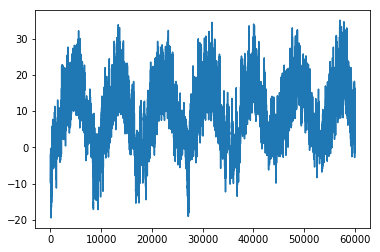

In [41]:
plt.plot(results['Predictions'])

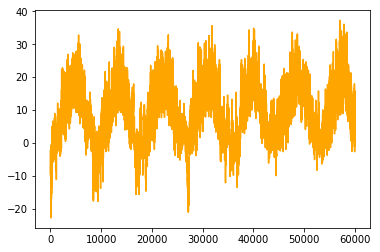

In [40]:
plt.plot(results['Actuals'], color = 'orange')

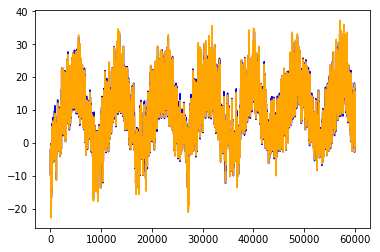

In [39]:
plt.plot(results['Predictions'], color = 'blue')
plt.plot(results['Actuals'], color = 'orange')